In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [6]:
s_p=30 #quantos pontos os dados de entrada tem
s_d=80 #quantos exemplos de cada tipo tem meu Dtrain
s_t=10 #quantos exemplos de cada tipo para teste
p_r = 0.7 #porcentagem de ruido nos cossenos
t=np.linspace(0,8*np.pi,s_p)

In [7]:

#dados de treinamento
x=np.zeros([2*s_d,s_p])
x[0:s_d,0:s_p]=(1-p_r)*np.ones([s_d,1])*np.cos(t)
x[0:s_d,0:s_p]=x[0:s_d,0:s_p]+p_r*np.random.normal(0, 0.8, [s_d,s_p])
x[s_d:2*s_d,0:s_p]=np.random.normal(0, 0.7, [s_d,s_p])
y=np.zeros([2*s_d,1])
y[0:s_d]=np.ones([s_d,1])

In [8]:
#dados de teste
x_t=np.zeros([2*s_t,s_p])
x_t[0:s_t,0:s_p]=(1-p_r)*np.ones([s_t,1])*np.cos(t)
x_t[0:s_t,0:s_p]=x_t[0:s_t,0:s_p]+p_r*np.random.normal(0, 0.8, [s_t,s_p])
x_t[s_t:2*s_t,0:s_p]=np.random.normal(0, 0.7, [s_t,s_p])
y_t=np.zeros([2*s_t,1]);y_t[0:s_t]=np.ones([s_t,1])

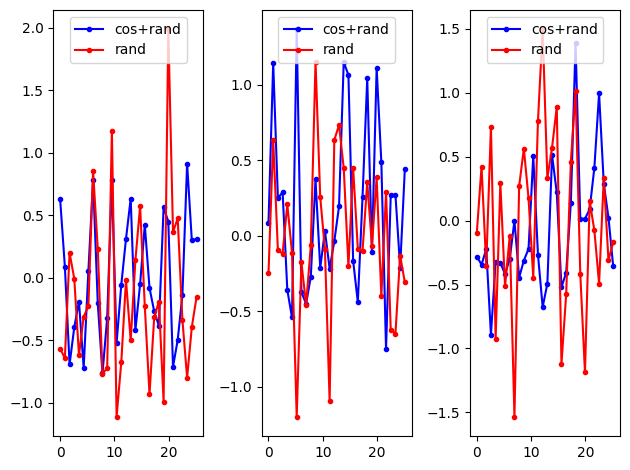

In [9]:
#mostra alguns dados de treinamento
plt.figure()
for nn in range(0,3):
  plt.subplot(1,3,nn+1)
  plt.plot(t,x[nn,:],'b.-',label='cos+rand')
  plt.plot(t,x[s_d+nn,:],'r.-',label='rand')
  plt.legend(loc='upper center')
plt.tight_layout()

In [10]:

# salva o dataset
with h5py.File('meu_data_set.h5', 'w') as hf:
    hf.create_dataset("tempo", data=t)
    hf.create_dataset("xtreinamento",  data=x)
    hf.create_dataset("ytreinamento",  data=y)
    hf.create_dataset("xteste",  data=x_t)
    hf.create_dataset("yteste",  data=y_t)
    hf.create_dataset("data_info",data=[s_p,s_d,s_t])
print('xtreinamento=',x.shape)

xtreinamento= (160, 30)


#  estudando  o aprendizado de máquina na prática.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

In [12]:
with h5py.File('meu_data_set.h5', 'r') as hf:
    print('dados do arquivo: ',list(hf.keys()))
    [s_p,s_d,s_t]=hf['data_info'][:]
    y_train = hf['ytreinamento'][:]
    y_test = hf['yteste'][:]
    x_train = hf['xtreinamento'][:]
    x_test = hf['xteste'][:]
print('numero de exemplos de treinamento:',2*s_d)
print('numero de exemplos de teste:',2*s_t)

dados do arquivo:  ['data_info', 'tempo', 'xteste', 'xtreinamento', 'yteste', 'ytreinamento']
numero de exemplos de treinamento: 160
numero de exemplos de teste: 20


In [13]:
#cria e treina a rede neural
# define a rede neural "keras model"
model=tf.keras.Sequential(name='rede_IF_02')
model.add(tf.keras.layers.Dense(12, input_dim=s_p, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# compila a rede neural
opt = tf.keras.optimizers.Adam(learning_rate=0.05);
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "rede_IF_02"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485 (1.89 KB)

 Trainable params: 485 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# treina a rede neural com o data set
history =model.fit(x_train, y_train,batch_size=2*s_d, epochs=100,verbose=0)

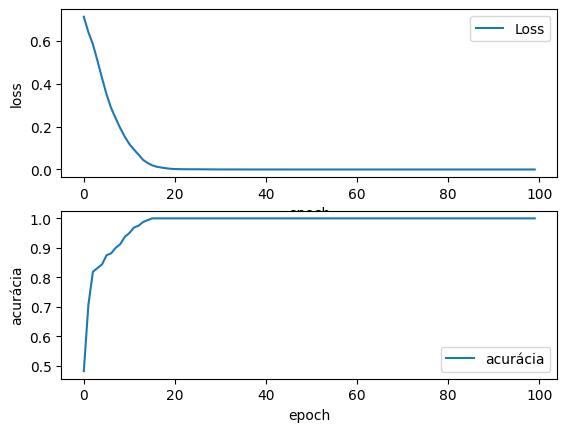

In [16]:
# mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['Loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'], loc='lower right')
plt.show()

In [17]:
#faz previsões com a rede treinada
y_pred=model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [18]:
# calcula a accurácia do teste
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8500 - loss: 0.5388
Accuracy: 85.00


In [19]:
#mostra os resultados esperados e os alcançados lado a lado
print('data pred =',np.concatenate((y_test, np.around(y_pred)),axis=1))


data pred = [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


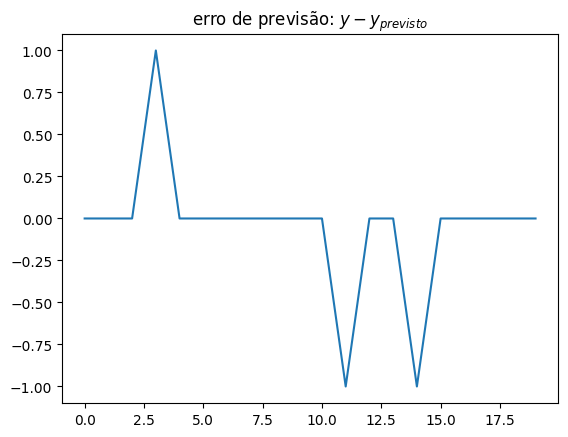

In [20]:
# faz o gráfico do erro de previsão
plt.figure()
plt.plot(y_test-np.around(y_pred))
plt.title('erro de previsão: $y-y_{previsto}$')
plt.show()